In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, io
from pandas import Series, DataFrame, read_table
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Data Analysis and Exploration


## User Data


### Exploratory Data Analysis:


In [9]:
df_users = pd.read_csv("BX-Users.csv", delimiter=",", encoding="latin-1")
df_users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB
None


In [11]:
print(df_users.isnull().sum())

user_id          0
Location         1
Age         110763
dtype: int64


In [12]:
print("Number of unique users:\n")
print(df_users.nunique())

Number of unique users:

user_id     278859
Location     57339
Age            165
dtype: int64


In [13]:
print(df_users.describe())

                 Age
count  168096.000000
mean       34.751434
std        14.428097
min         0.000000
25%        24.000000
50%        32.000000
75%        44.000000
max       244.000000


In [16]:
df_users.columns = ["user_id", "location", "age"]
df_users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


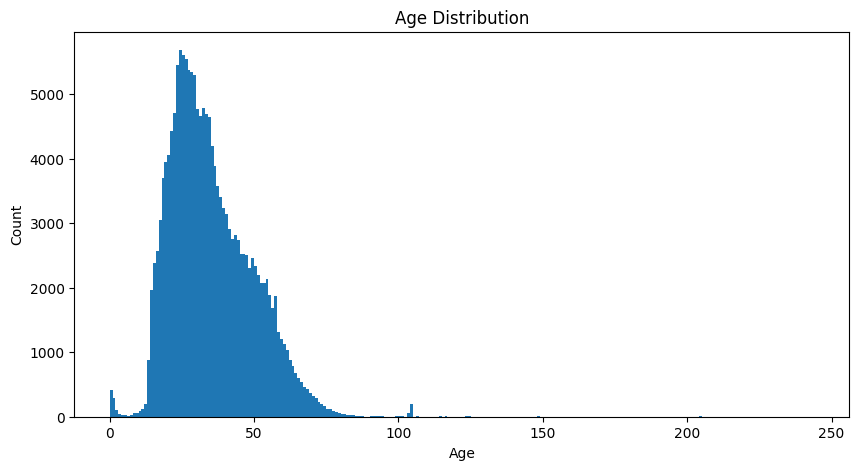

In [17]:
# Plot the age distribution of users
def plot_age_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df["age"], bins=np.arange(df["age"].min(), df["age"].max() + 1))
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age Distribution")
    plt.show()


plot_age_distribution(df_users)

## Book Data


### Exploratory Data Analysis


In [18]:
df_books = pd.read_csv("BX-Books.csv", delimiter=",", encoding="latin-1")
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [19]:
print(df_books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271377 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB
None


In [24]:
df_books.isna().any()

isbn                   False
book_title             False
book_author             True
year_of_publication    False
publisher               True
dtype: bool

In [32]:
print(df_books.isnull().sum())

isbn                    0
book_title              0
book_author             2
year_of_publication    22
publisher               2
dtype: int64


In [31]:
books_unique_values = df_books.nunique()
print(books_unique_values)

isbn                   271379
book_title             242150
book_author            102041
year_of_publication       116
publisher               16823
dtype: int64


### Data Preparation


In [33]:
df_books = df_books.sort_values(by=["book_title", "isbn"], ascending=[0, 1])
df_books.reset_index(drop=True, inplace=True)

In [34]:
df_books["year_of_publication"] = pd.to_numeric(
    df_books["year_of_publication"], errors="coerce"
)

In [35]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,2842192508,Ã?Â?thique en toc,Didier Daeninckx,1998.0,Baleine
1,3442725739,Ã?Â?stlich der Berge.,David Guterson,2000.0,btb
2,3451274973,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001.0,"Herder, Freiburg"
3,325721538X,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987.0,Diogenes Verlag
4,3499232499,Ã?Â?lpiraten.,Janwillem van de Wetering,2002.0,Rowohlt Tb.


In [36]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 271379 non-null  object 
 1   book_title           271379 non-null  object 
 2   book_author          271377 non-null  object 
 3   year_of_publication  271357 non-null  float64
 4   publisher            271377 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


## Ratings Data


### Exploratory Data Analysis


In [ ]:
df_ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter=",", encoding="latin-1")

In [ ]:
df_ratings.head()

In [ ]:
print(df_ratings.info())

In [ ]:
nunique_rating_user_id = df_ratings["user_id"].nunique()
print(f"Unique number of user_id: {nunique_rating_user_id}")

unique_rating_isbn = df_ratings["isbn"].nunique()
print(f"Unique number of isbn: {unique_rating_isbn}")

In [ ]:
df_ratings.isnull().sum()

In [ ]:
sns.displot(df_ratings["rating"], kde=True)

### Data Preparation


In [ ]:
df_ratings = df_ratings[df_ratings["rating"] != 0]

In [ ]:
df_ratings.head()

In [ ]:
# df_ratings = df_ratings[df_ratings["rating"] > 4]
# df_ratings.head()

In [ ]:
df_book_ratings = pd.merge(df_ratings, df_books, on="isbn")
df_book_ratings = df_book_ratings[["user_id", "isbn", "book_title", "rating"]]
df_book_ratings = df_book_ratings.sort_values(
    ["isbn", "book_title"], ascending=[0, 0]
).reset_index(drop=True)

df_book_ratings.head()

In [ ]:
df_book_ratings.info()

In [ ]:
user_id_idx_map = {
    user: i for i, user in enumerate(df_book_ratings["user_id"].unique())
}

In [ ]:
df_book_ratings["user_id_idx"] = df_book_ratings["user_id"].map(user_id_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
isbn_idx_map = {isbn: i for i, isbn in enumerate(df_book_ratings["isbn"].unique())}

In [ ]:
df_book_ratings["isbn_idx"] = df_book_ratings["isbn"].map(isbn_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
df_book_ratings.sort_values(by=["user_id_idx", "isbn_idx"], inplace=True)
df_book_ratings.reset_index(drop=True, inplace=True)

In [ ]:
df_book_ratings.head()

In [ ]:
ratings_matrix = df_book_ratings.pivot_table(
    index="user_id_idx", columns="isbn_idx", values="rating"
).reset_index(drop=True)

In [ ]:
ratings_matrix.head()

In [ ]:
ratings_matrix.info()

In [ ]:
# get the column names of the ratings matrix
isbn_idx_7 = ratings_matrix[7]
isbn_idx_7.head()

In [ ]:
isbn_idx_7.info()

In [ ]:
similarbooks = ratings_matrix.corrwith(isbn_idx_7)
similarbooks = similarbooks.dropna()
df = pd.DataFrame(similarbooks)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the ratings matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    ratings_matrix.index, ratings_matrix.values, test_size=0.25
)